In [33]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

csv_file = '/content/drive/My Drive/TFG_AlienEmbarecRiadi/hotel_bookings_numeric.csv'
df = pd.read_csv(csv_file, delimiter=',')


del df['reservation_status_date']

data = df.copy()
del data['agent']
del data['arrival_year_week']

for col in data.columns: 
    print(col) 

print(data.shape)
print(data.head())

hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
meal
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
total_stayed_nights
weekend_nights_proportion
reservation_status_year
reservation_status_month
reservation_status_day
(119390, 33)
   hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  days

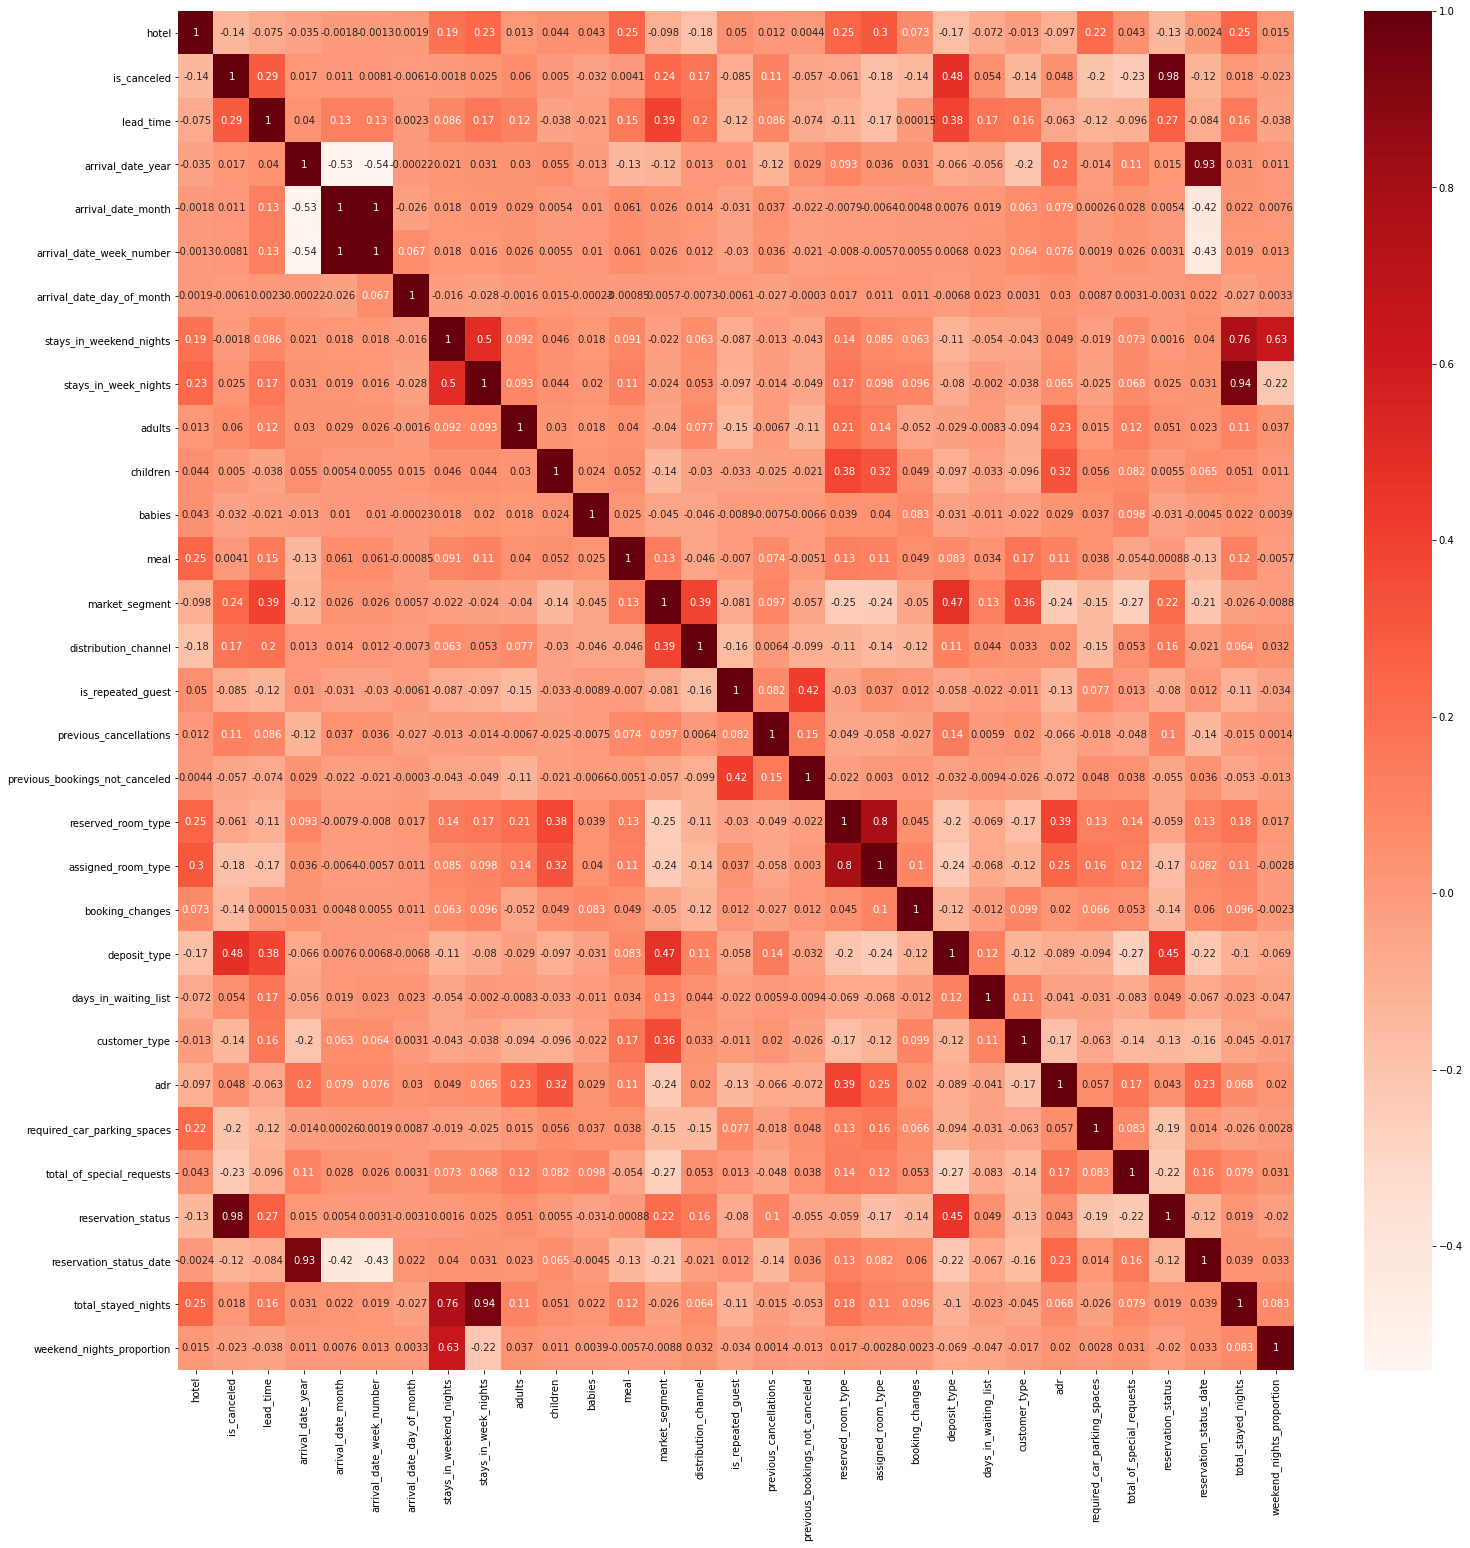

In [ ]:
# Correlation Matrix

import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["adr"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.35]
relevant_features


reserved_room_type    0.39206
adr                   1.00000
Name: adr, dtype: float64

In [ ]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues


const                              0.000000e+00
hotel                              0.000000e+00
is_canceled                        1.389744e-37
lead_time                          0.000000e+00
arrival_date_year                  1.811791e-30
arrival_date_month                1.132734e-144
arrival_date_week_number          1.721367e-117
arrival_date_day_of_month         1.140398e-144
stays_in_weekend_nights            4.018516e-52
stays_in_week_nights               4.007348e-58
adults                             0.000000e+00
children                           0.000000e+00
babies                             4.987256e-03
meal                               0.000000e+00
market_segment                     0.000000e+00
distribution_channel              2.299619e-133
is_repeated_guest                 5.028069e-210
previous_cancellations             1.617877e-07
previous_bookings_not_canceled     1.186652e-17
reserved_room_type                 0.000000e+00
assigned_room_type                3.0122

In [ ]:
X = data.drop('adr', 1)
y = data['adr']

print(y)


0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64


In [ ]:
import statsmodels.api as sm
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                              0.000000e+00
hotel                              0.000000e+00
is_canceled                        1.389744e-37
lead_time                          0.000000e+00
arrival_date_year                  1.811791e-30
arrival_date_month                1.132734e-144
arrival_date_week_number          1.721367e-117
arrival_date_day_of_month         1.140398e-144
stays_in_weekend_nights            4.018516e-52
stays_in_week_nights               4.007348e-58
adults                             0.000000e+00
children                           0.000000e+00
babies                             4.987256e-03
meal                               0.000000e+00
market_segment                     0.000000e+00
distribution_channel              2.299619e-133
is_repeated_guest                 5.028069e-210
previous_cancellations             1.617877e-07
previous_bookings_not_canceled     1.186652e-17
reserved_room_type                 0.000000e+00
assigned_room_type                3.0122

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.2):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'total_stayed_nights', 'weekend_nights_proportion']


In [ ]:
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)



[ True False False  True False False False False False  True  True False
  True False False  True False False False False False False False False
  True False False False False False]
[ 1  3 22  1  9 13 14 18 19  1  1  8  1  5  6  1 12 17  2 10 16 11 23 15
  1  7  4 24 20 21]


In [ ]:
#no of features
import numpy as np
from sklearn.model_selection import train_test_split
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.276861


In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['hotel', 'is_canceled', 'arrival_date_year', 'adults', 'children', 'meal', 'is_repeated_guest', 'reserved_room_type', 'required_car_parking_spaces', 'reservation_status'], dtype='object')


In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 82.054278
Best score using built-in LassoCV: 0.077363


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 27 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

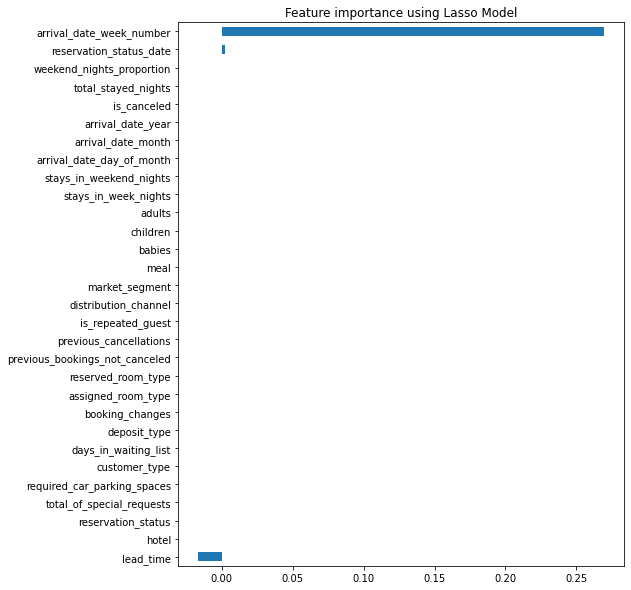

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))    
sel.fit_transform(X)

print(sel)

VarianceThreshold(threshold=0.15999999999999998)
